<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Выбор локации для скважины

Добывающей компании «ГлавРосГосНефть» нужно решить, где бурить новую скважину. Нам предоставлены пробы нефти в трёх регионах: в каждом из 10 000 месторождений, где измерили качество нефти и объём её запасов. При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки. Бюджет на разработку скважин в регионе - 10 млрд рублей. При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей. 

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Цель исследования

Построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой *Bootstrap.* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирать регион с наибольшей средней прибылью.


# Описание данных

Данные геологоразведки трёх регионов находятся в трёх разных таблицах с параметрами:
 
- `id` — уникальный идентификатор скважины;
- `f0, f1, f2` — три признака точек (неважно, что они означают, но сами признаки значимы);
- `product` — объём запасов в скважине (тыс. баррелей).


# Этапы исследования

1. Загрузка и подготовка данных
2. Обучение и проверка модели
3. Подготовка к расчёту прибыли
4. Расчёт прибыли и рисков

## Загрузка и подготовка данных

In [ ]:
# импортируем нужные библиотеки

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# сохраним данные по трем регионам в три разные переменные

data_0 = pd.read_csv('***')
data_1 = pd.read_csv('***')
data_2 = pd.read_csv('***')

In [ ]:
# посмотрим первые 5 строк всех таблиц

for data in [data_0, data_1, data_2]:
    print(data.head())

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


In [ ]:
# выведем общую информацию по всем трем таблицам

print(data_0.info())
print(data_1.info())
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

Пропуски отсутствуют. Типы данных корректные.

In [ ]:
# выведем количество уникальных id каждой таблицы

print(data_0['id'].nunique())
print(data_1['id'].nunique())
print(data_2['id'].nunique())

99990
99996
99996


In [ ]:
# посчитаем явные дубликаты

print(data_0.duplicated().sum())
print(data_1.duplicated().sum())
print(data_2.duplicated().sum())

0
0
0


Есть повторяющиеся id в каждой таблице, но при этом явынх дубликатов нет.

In [ ]:
# удалим ненужный для обучения столбец id

data_0 = data_0.drop('id', axis=1)
data_1 = data_1.drop('id', axis=1)
data_2 = data_2.drop('id', axis=1)

Посмотрим на корреляцию признаков во всех 3 регионах.

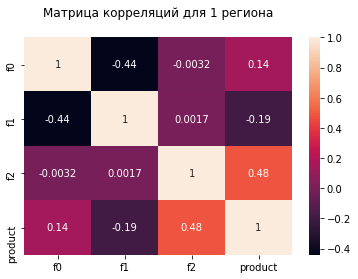

In [ ]:
sns.heatmap(data_0.corr(), annot=True);
plt.title('Матрица корреляций для 1 региона'+ "\n");

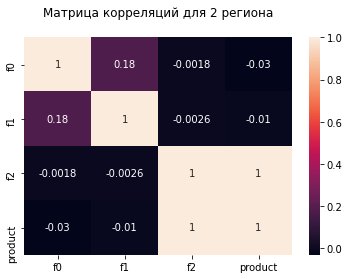

In [ ]:
sns.heatmap(data_1.corr(), annot=True);
plt.title('Матрица корреляций для 2 региона'+ "\n");

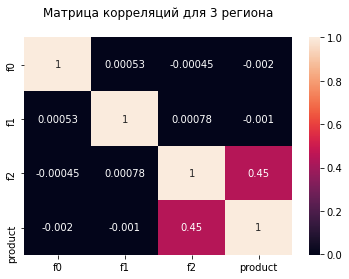

In [ ]:
sns.heatmap(data_2.corr(), annot=True);
plt.title('Матрица корреляций для 3 региона'+ "\n");

Примечательно, что во 2 регионе объем сырья напрмямую связан с параметром `f2` (корреляция 1). Меньшая, но заметная положительная связь этих признаков в 1 и 3 регионах (0,48 и 0,45). Заметная отрицательная связь `f0` и `f1` (-0,44) в 1 регионе.

Для большей наглядности для каждого региона построим матрицы диаграмм рассеяния.

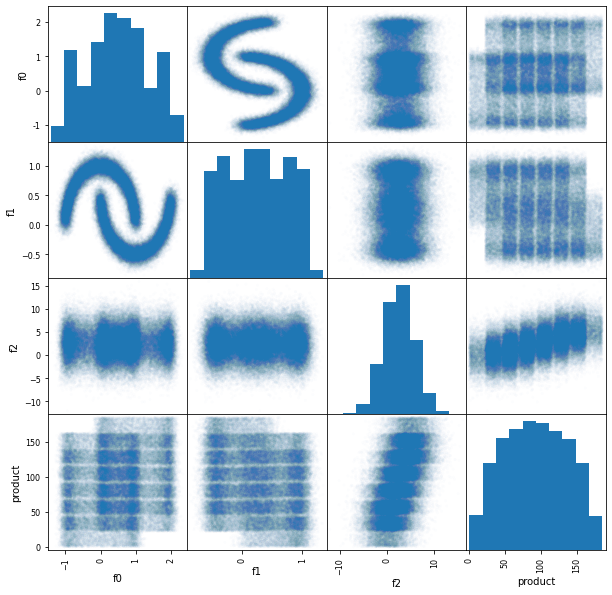

In [ ]:
# 1 регион
pd.plotting.scatter_matrix(data_0, figsize=(10, 10), alpha=0.01);

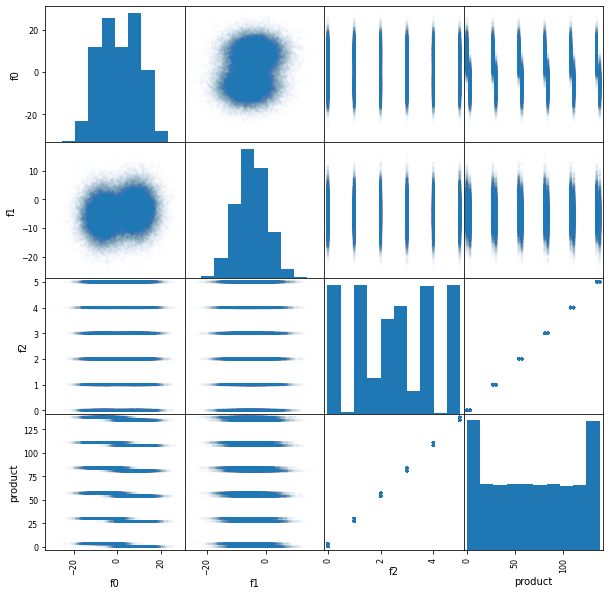

In [ ]:
# 2 регион
pd.plotting.scatter_matrix(data_1, figsize=(10, 10), alpha=0.01);

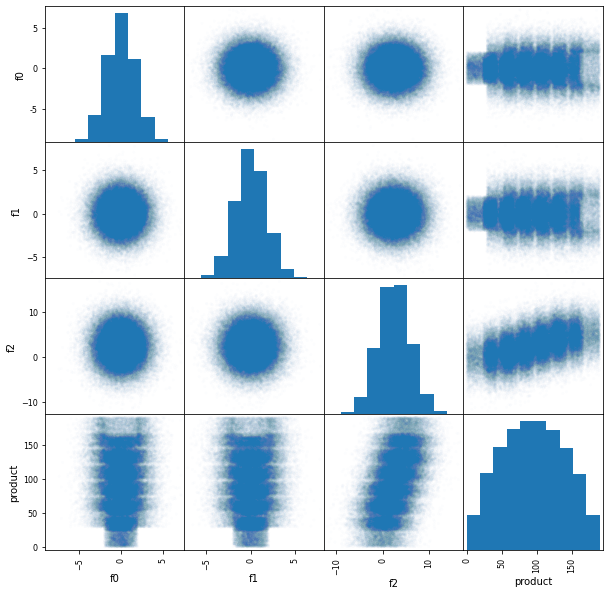

In [ ]:
# 3 регион
pd.plotting.scatter_matrix(data_2, figsize=(10, 10), alpha=0.01);

Во всех регионах видим замеченную благодаря матрицам корреляций связь объема сырья и `f2` (особенно в 2 регионе). Интеренсная связь признаков `f0` и `f1` в 1 регионе: заметны 2 явных кластера. В основном везеде признаки распределены нормальным образом. Чего не скажешь про объем сырья в 2 регионе: наибольшее количество именно крайних границ распределения. Распределение `f2` в регионе тоже нетипичное.

**Вывод**

Пропусков в данных нет. Типы данных корректные. Есть единичные повторяющиеся id, но не явные дубликаты. Признак `f2` во всех регионах положительно связан с объемом сырья (особенно во 2 регионе - корреляция 100%).

## Обучение и проверка модели

Обучим 3 разные линейные регрессии на основе данных по 3 разным регионам. Сравним реальный и предсказанный средний запас сырья на валидационной выборке. Оценим RMSE для каждой модели.

**Регион 1**

In [ ]:
features_0 = data_0.drop('product', axis=1)
target_0 = data_0['product']

In [ ]:
features_train, features_valid, target_train, target_valid = \
train_test_split(features_0, target_0, test_size=0.25, random_state=12345) 

In [ ]:
model_0 = LinearRegression()
model_0.fit(features_train, target_train)
predictions_valid = model_0.predict(features_valid)

In [ ]:
rmse = mean_squared_error(target_valid, predictions_valid, squared=False)

In [ ]:
print('Реальный средний запас на валиданционной выборке:', target_valid.mean())
print('Средний запас предсказанного сырья:', predictions_valid.mean())
print('RMSE:', rmse)

Реальный средний запас на валиданционной выборке: 92.07859674082927
Средний запас предсказанного сырья: 92.59256778438035
RMSE: 37.5794217150813


**Регион 2**

In [ ]:
features_1 = data_1.drop('product', axis=1)
target_1 = data_1['product']

In [ ]:
features_train, features_valid, target_train, target_valid = \
train_test_split(features_1, target_1, test_size=0.25, random_state=12345) 

In [ ]:
model_1 = LinearRegression()
model_1.fit(features_train, target_train)
predictions_valid = model_1.predict(features_valid)

In [ ]:
rmse = mean_squared_error(target_valid, predictions_valid, squared=False)

In [ ]:
print('Реальный средний запас на валиданционной выборке:', target_valid.mean())
print('Средний запас предсказанного сырья:', predictions_valid.mean())
print('RMSE:', rmse)

Реальный средний запас на валиданционной выборке: 68.72313602435997
Средний запас предсказанного сырья: 68.728546895446
RMSE: 0.893099286775617


**Регион 3**

In [ ]:
features_2 = data_2.drop('product', axis=1)
target_2 = data_2['product']

In [ ]:
features_train, features_valid, target_train, target_valid = \
train_test_split(features_2, target_2, test_size=0.25, random_state=12345) 

In [ ]:
model_2 = LinearRegression()
model_2.fit(features_train, target_train)
predictions_valid = model_2.predict(features_valid)

In [ ]:
rmse = mean_squared_error(target_valid, predictions_valid, squared=False)

In [ ]:
print('Реальный средний запас на валиданционной выборке:', target_valid.mean())
print('Средний запас предсказанного сырья:', predictions_valid.mean())
print('RMSE:', rmse)

Реальный средний запас на валиданционной выборке: 94.88423280885438
Средний запас предсказанного сырья: 94.96504596800489
RMSE: 40.02970873393434


**Вывод**

Все три модели очень близко предсказали **средние** запасы объема сырья на валидационной выборке. Однако модели обученные на данных 1 и 3 регионов имеют высокий показатель ошибки (RMSE равен 37 и 40). Модель обученная на данных 2 региона более точная (RMSE = 0.9). 

## Подготовка к расчёту прибыли

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Посчитаем реальные средние объемы сырья по всем регионам. Подготовим переменные для дальнейшего подсчета прибыли.

In [ ]:
# необходимый средний объем сырья в скважине
# для безубыточной разработки 200 скважин

req_mean_prod = 10000000000/(200*450000)
req_mean_prod

111.11111111111111

In [ ]:
# необходимый общий запас сырья 200 скважин 
# для их бызубыточной разработки

req_mean_prod*200

22222.222222222223

In [ ]:
# реальные средние объемы сырья в регионах

print('Средний объем сырья в 1 регионе:', data_0['product'].mean())
print('Средний объем сырья во 2 регионе:', data_1['product'].mean())
print('Средний объем сырья в 3 регионе:', data_2['product'].mean())

Средний объем сырья в 1 регионе: 92.50000000000001
Средний объем сырья во 2 регионе: 68.82500000000002
Средний объем сырья в 3 регионе: 95.00000000000004


In [ ]:
# сохраним сумму затрат на все 200 скважин в переменную expenses 

expenses = 10000000000

In [ ]:
# сохраним цену за единицу объема сырья в переменную price

price = 450000

In [ ]:
# сохраним число используемых при разведке скважин в points

points = 500

**Вывод**

Необходимый средний объем сырья одной скважины для безубыточной разработки 200 скважин равен 111.11 тыс. баррелей. Средние объемы сырья по 1, 2 и 3 регионам 92.5, 68.82 и 95 тыс. баррелей соответственно.

## Расчёт прибыли и рисков 

Напишем функцию рассчета прибыли на основе предсказания объемов сырья 200 самых лучших скважин. Для каждого региона при помощи техники Bootstrap посчитаем среднюю прибыль, 95%-й доверительный интервал и риск убытков. Определим лучший регион для разработки 200 скважин.

In [ ]:
def profit(data, model, price, expenses):
    data['pred_product'] = model.predict(data[['f0','f1','f2']])
    return data.sort_values('pred_product', ascending=False)\
    ['product'].head(200).sum()*price-expenses

Средняя прибыль: 423566143.15
95%-й доверительный интервал: от -78796358.29 до 966137657.68
Риск убытков: 0.053


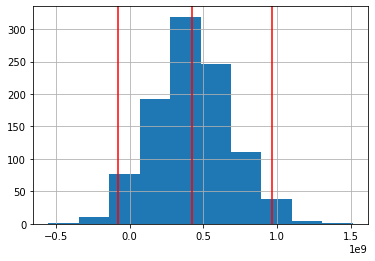

In [ ]:
model_0 = LinearRegression()
model_0.fit(features_0, target_0)
state = np.random.RandomState(12345)
profits = []
for i in range(1000):
    data_subsample = data_0.sample(n=points, replace=True, random_state=state)
    profits.append(profit(data_subsample, model_0, price, expenses))
    
profits = pd.Series(profits)
mean = profits.mean()
lower = profits.quantile(0.025)
upper = profits.quantile(0.975)

print('Средняя прибыль:', mean.round(2))
print(f'95%-й доверительный интервал: от {lower.round(2)} до {upper.round(2)}')
print('Риск убытков:', (profits < 0).mean())
profits.hist();
for x in [mean, lower, upper]:
    plt.axvline(x=x, color='r')

Средняя прибыль: 448723501.23
95%-й доверительный интервал: от 37498074.53 до 823829920.21
Риск убытков: 0.014


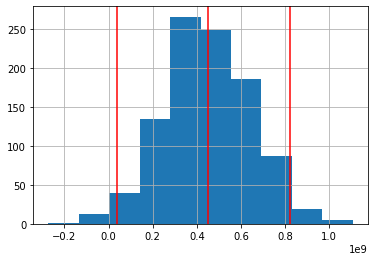

In [ ]:
model_1 = LinearRegression()
model_1.fit(features_1, target_1)
state = np.random.RandomState(12345)
profits = []
for i in range(1000):
    data_subsample = data_1.sample(n=points, replace=True, random_state=state)
    profits.append(profit(data_subsample, model_1, price, expenses))
    
profits = pd.Series(profits)
mean = profits.mean()
lower = profits.quantile(0.025)
upper = profits.quantile(0.975)

print('Средняя прибыль:', mean.round(2))
print(f'95%-й доверительный интервал: от {lower.round(2)} до {upper.round(2)}')
print('Риск убытков:', (profits < 0).mean())
profits.hist();
for x in [mean, lower, upper]:
    plt.axvline(x=x, color='r')

Средняя прибыль: 373939766.85
95%-й доверительный интервал: от -173370126.97 до 894066150.6
Риск убытков: 0.091


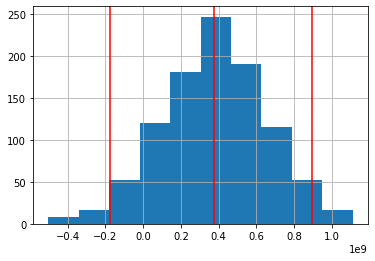

In [ ]:
model_2 = LinearRegression()
model_2.fit(features_2, target_2)
state = np.random.RandomState(12345)
profits = []
for i in range(1000):
    data_subsample = data_2.sample(n=points, replace=True, random_state=state)
    profits.append(profit(data_subsample, model_2, price, expenses))
    
profits = pd.Series(profits)
mean = profits.mean()
lower = profits.quantile(0.025)
upper = profits.quantile(0.975)

print('Средняя прибыль:', mean.round(2))
print(f'95%-й доверительный интервал: от {lower.round(2)} до {upper.round(2)}')
print('Риск убытков:', (profits < 0).mean())
profits.hist();
for x in [mean, lower, upper]:
    plt.axvline(x=x, color='r')

**Вывод**

В 1 и 3 регионах риски убытков выше 2,5% (5,3% и 9,1% соответственно). Во 2 регионе - 1,4%: он подходит для разработки новых скважин. Также стоит отметить, что в этом регионе наибольшая средняя прибыль - 448 723 501.23 руб. (95%-й доверительный интервал: от 37 498 074.53 до 823 829 920.21 руб.)

## Общий вывод

По результатам исследования наибольшую средную прибыль способен принести 2 регион - 448 723 501.23 руб. (95%-й доверительный интервал: от 37 498 074.53 до 823 829 920.21 руб.). Риск убытков 1,4%. Рекмендуется отдать предпочтение 2 региону для разработки 200 новых скважин.